# Decision Tree Classifier

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Reading in the Data

In [2]:
df = pd.read_csv('Iris.csv', index_col='Id')

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## Model Preparation

In [5]:
X = df.drop(columns='Species')
y = df['Species']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

## Model Development

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = dtree.predict(X_test)

## Model Evaluation

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[22  0  0]
 [ 0 19  1]
 [ 0  1 17]]

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.97        60
      macro avg       0.96      0.96      0.96        60
   weighted avg       0.97      0.97      0.97        60



## Tree Visualization

In [14]:
from dtreeviz.trees import dtreeviz
from sklearn import tree

Using plot tree

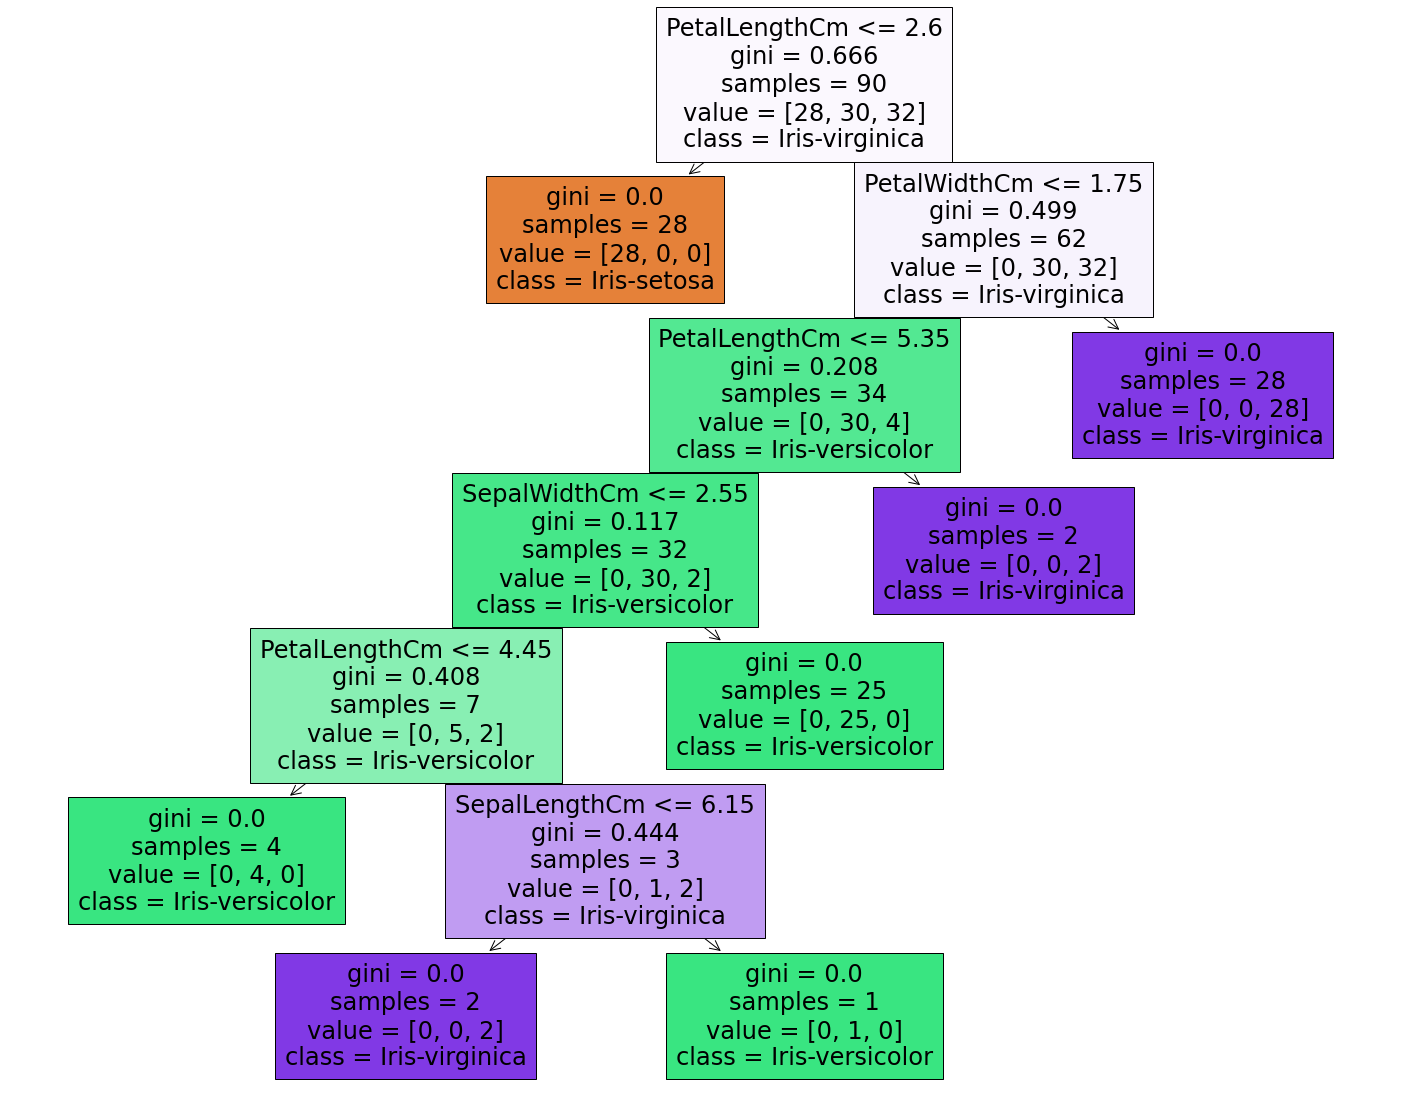

In [15]:
fig = plt.figure(figsize=(25,20))

viz = tree.plot_tree(
    dtree,
    feature_names=list(X.columns),
    class_names=list(y.value_counts().index),
    filled=True)

Using Graphviz

In [16]:
import graphviz

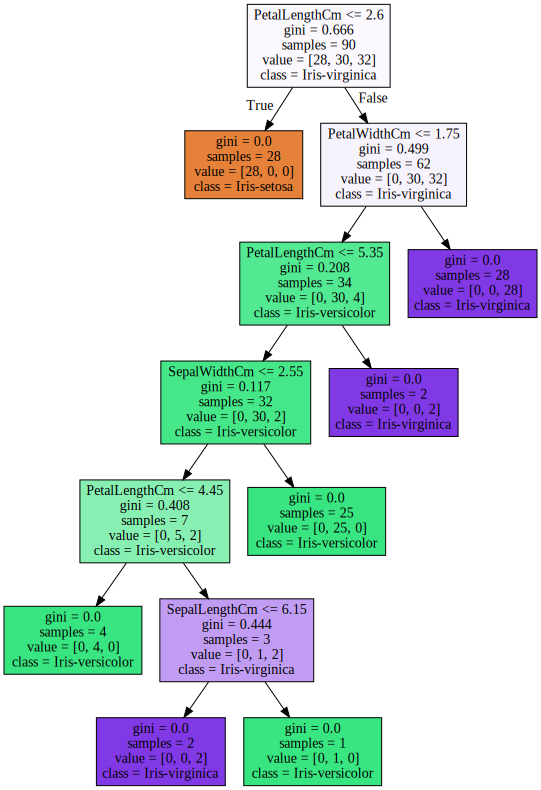

In [17]:
dot_data = tree.export_graphviz(dtree, feature_names=list(X.columns),
                                class_names=list(y.value_counts().index), filled=True)

graph = graphviz.Source(dot_data, format = 'png')
graph